In [236]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import pickle

# First part dataset

In [237]:
data1 = pd.read_csv('diabetes_train_analysis.csv')
data1.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,62538,low,low,0,0,1,100/80,0
1,49159,low,low,0,0,1,120/82,0
2,60683,low,low,0,0,1,120/80,0
3,42924,low,low,0,0,0,120/80,0
4,52888,low,low,0,0,0,120/80,0


In [238]:
data1.nunique()

id             60000
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
pressure        1111
diabetes           2
dtype: int64

In [239]:
data1.dtypes

id              int64
cholesterol    object
gluc           object
smoke           int64
alco            int64
active          int64
pressure       object
diabetes        int64
dtype: object

In [240]:
data1.isnull().sum()

id              0
cholesterol     0
gluc            0
smoke           0
alco            0
active          0
pressure       93
diabetes        0
dtype: int64

In [241]:
# 0.1% pressure isnull so we can drop it
data1.dropna(subset=['pressure'], inplace=True)

In [242]:
data1.isnull().sum()

id             0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
pressure       0
diabetes       0
dtype: int64

In [243]:
data1.head(10)

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,62538,low,low,0,0,1,100/80,0
1,49159,low,low,0,0,1,120/82,0
2,60683,low,low,0,0,1,120/80,0
3,42924,low,low,0,0,0,120/80,0
4,52888,low,low,0,0,0,120/80,0
5,54781,low,low,0,0,1,160/100,0
6,10661,low,low,0,0,1,120/80,0
7,12127,low,low,0,0,1,120/80,0
8,20298,low,low,0,0,1,120/80,0
9,78105,low,low,0,0,1,123/83,0


# Second part Dataset

In [244]:
data2 = pd.read_csv('diabetes_train_info.csv')
data2.head()

,id,age,height,weight,gender
0,0,50,168,62.0,female
1,1,55,156,85.0,male
2,2,18857,165,64.0,male
3,3,17623,169,82.0,female
4,4,47,156,56.0,male


In [245]:
data2.nunique()

id        60000
age        7667
height      104
weight      269
gender        2
dtype: int64

In [246]:
data2.isnull().sum()

id           0
age          0
height       0
weight    1998
gender       0
dtype: int64

In [247]:
# To solve the nan values as it is just 3%. So deciding to drop it.
data2 = data2.dropna(subset=['weight'])

In [248]:
data2.isnull().sum()

id        0
age       0
height    0
weight    0
gender    0
dtype: int64

In [249]:
data2.head(10)

,id,age,height,weight,gender
0,0,50,168,62.0,female
1,1,55,156,85.0,male
2,2,18857,165,64.0,male
3,3,17623,169,82.0,female
4,4,47,156,56.0,male
5,8,21914,151,67.0,male
6,9,60,157,93.0,male
7,12,61,178,95.0,female
8,13,48,158,71.0,male
9,14,19834,164,68.0,male


# Combining the two data set (Inner Join)

In [250]:
# using merge function by setting how='inner'.
# Basically Joining two tables with respect to id. Taken inner join approach.

df = pd.merge(data1, data2, 
              on='id', 
              how='inner')
df.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,age,height,weight,gender
0,62538,low,low,0,0,1,100/80,0,54,169,76.0,female
1,49159,low,low,0,0,1,120/82,0,49,165,65.0,male
2,60683,low,low,0,0,1,120/80,0,21962,170,56.0,male
3,42924,low,low,0,0,0,120/80,0,20287,169,62.0,male
4,52888,low,low,0,0,0,120/80,0,16202,166,67.0,male


In [251]:
print("All Columns names are as follows:- ",df.columns)
print("                                                                        ")
print("------------------------------------------------------------------------")
print("Rows and columns are:-",df.shape)
print("                                                                        ")
print("------------------------------------------------------------------------")
print("dtypes of all columns are as follows:-",df.dtypes)
print("                                                                        ")
print("------------------------------------------------------------------------")
print("Unique values for all columns -",df.nunique())
print("                                                                        ")
print("------------------------------------------------------------------------")
print("Null values for all columns -",df.isnull().sum())

All Columns names are as follows:-  Index(['id', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'pressure',
       'diabetes', 'age', 'height', 'weight', 'gender'],
      dtype='object')
                                                                        
------------------------------------------------------------------------
Rows and columns are:- (57910, 12)
                                                                        
------------------------------------------------------------------------
dtypes of all columns are as follows:- id               int64
cholesterol     object
gluc            object
smoke            int64
alco             int64
active           int64
pressure        object
diabetes         int64
age              int64
height           int64
weight         float64
gender          object
dtype: object
                                                                        
------------------------------------------------------------------------
Unique v

In [252]:
# Remove column name 'id'
df.drop(['id'], axis=1, inplace=True)

# Replacing the categorical values into binary values
# gender column
df = df.replace({'female':0,'male':1})
#df = df.replace({'f':0,'m':1})

# replace space with another character
df.pressure = df.pressure.str.replace(' ', '')

In [253]:
df.head()

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,age,height,weight,gender
0,low,low,0,0,1,100/80,0,54,169,76.0,0
1,low,low,0,0,1,120/82,0,49,165,65.0,1
2,low,low,0,0,1,120/80,0,21962,170,56.0,1
3,low,low,0,0,0,120/80,0,20287,169,62.0,1
4,low,low,0,0,0,120/80,0,16202,166,67.0,1


In [254]:
df.dtypes

cholesterol     object
gluc            object
smoke            int64
alco             int64
active           int64
pressure        object
diabetes         int64
age              int64
height           int64
weight         float64
gender           int64
dtype: object

In [255]:
df.shape

(57910, 11)

In [256]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
smoke,57910.0,0.087567,0.282666,0.0,0.0,0.0,0.0,1.0
alco,57910.0,0.053255,0.224544,0.0,0.0,0.0,0.0,1.0
active,57910.0,0.803713,0.397192,0.0,1.0,1.0,1.0,1.0
diabetes,57910.0,0.250509,0.433310,0.0,0.0,0.0,1.0,1.0
age,57910.0,13666.581471,9128.717544,30.0,60.0,18173.0,20581.0,23687.0
height,57910.0,164.313020,8.192021,55.0,159.0,165.0,170.0,250.0
weight,57910.0,74.192974,14.612125,10.0,65.0,71.0,82.0,200.0
gender,57910.0,0.653669,0.475804,0.0,0.0,1.0,1.0,1.0


# NOTICE -  There are outlier in (age, Upper_pressure, Lower_pressure)

# Outlier In Age Feature

# upper age is practicaly not possible what is mentioned in data set as it it demo data.

# so I am taking 64 years.

# Min age in data set is 30 years.

# Max age I have taken 100. I kniow lots of data is wasted. But unrealistic age is mentioned which should be treated as real life scenario.

In [257]:
min_threshold_age = df['age'].min()
min_threshold_age

30

In [258]:
max_threshold_age = 100

In [259]:
df = df[(df.age<=max_threshold_age) & (df.age>=min_threshold_age)]

In [260]:
df.shape

(17317, 11)

# Feature Engineering

In [261]:
# Perform featue engineering by splitting the pressure vales.
df = df.join(df['pressure'].str.split('/', 1, expand=True).rename(columns={0:'Upper_pressure', 1:'Lower_pressure'}))

In [262]:
df.head()

,cholesterol,gluc,smoke,alco,active,pressure,diabetes,age,height,weight,gender,Upper_pressure,Lower_pressure
0,low,low,0,0,1,100/80,0,54,169,76.0,0,100,80
1,low,low,0,0,1,120/82,0,49,165,65.0,1,120,82
14,medium,low,0,0,1,110/80,0,53,164,68.0,1,110,80
15,low,low,0,0,0,120/80,0,41,169,86.0,0,120,80
20,low,low,0,0,1,130/80,0,64,163,112.0,1,130,80


In [263]:
# Dropping pressure column as it is been delted.
df.drop('pressure', axis=1, inplace=True)

In [264]:
df.head()

,cholesterol,gluc,smoke,alco,active,diabetes,age,height,weight,gender,Upper_pressure,Lower_pressure
0,low,low,0,0,1,0,54,169,76.0,0,100,80
1,low,low,0,0,1,0,49,165,65.0,1,120,82
14,medium,low,0,0,1,0,53,164,68.0,1,110,80
15,low,low,0,0,0,0,41,169,86.0,0,120,80
20,low,low,0,0,1,0,64,163,112.0,1,130,80


In [265]:
df.isnull().sum()

cholesterol       0
gluc              0
smoke             0
alco              0
active            0
diabetes          0
age               0
height            0
weight            0
gender            0
Upper_pressure    0
Lower_pressure    0
dtype: int64

In [266]:
df.dtypes

cholesterol        object
gluc               object
smoke               int64
alco                int64
active              int64
diabetes            int64
age                 int64
height              int64
weight            float64
gender              int64
Upper_pressure     object
Lower_pressure     object
dtype: object

In [267]:
# Upper_pressure data type handling
df["Upper_pressure"] = df["Upper_pressure"].astype(int)

In [268]:
# Lower_pressure data type handling
df["Lower_pressure"] = df["Lower_pressure"].astype(int)

In [269]:
df.dtypes

cholesterol        object
gluc               object
smoke               int64
alco                int64
active              int64
diabetes            int64
age                 int64
height              int64
weight            float64
gender              int64
Upper_pressure      int32
Lower_pressure      int32
dtype: object

# Domain Knowledge - Upper pressure max value can be 90- 180 (above it hypertensive emergency )

# Domain Knowledge - Lower pressure max value can be 60-80

# Outlier Removal in Upper_pressure & Lower_pressure feature

In [270]:
max_threshold_UP = df['Upper_pressure'].quantile(0.99)
max_threshold_UP

180.0

In [271]:
min_threshold_UP = df['Upper_pressure'].quantile(0.01)
min_threshold_UP

90.0

In [272]:
df = df[(df.Upper_pressure<=max_threshold_UP) & (df.Upper_pressure>=min_threshold_UP)]

In [273]:
min_threshold_LP = df['Lower_pressure'].quantile(0.04)
min_threshold_LP

65.0

In [274]:
max_threshold_LP = df['Lower_pressure'].quantile(0.7)
max_threshold_LP

85.0

In [275]:
df = df[(df.Lower_pressure<=max_threshold_LP) & (df.Lower_pressure>=min_threshold_LP)]

In [276]:
df.shape

(11349, 12)

# Performing OrdinalEncoder on Two Categorical features

In [277]:
from sklearn.preprocessing import OrdinalEncoder

order_label_cholesterol = {"high":2,"medium":1,"low":0}
order_label_gluc = {"high":2,"medium":1,"low":0}

df['cholesterol'] = df['cholesterol'].map(order_label_cholesterol)
df['gluc'] = df['gluc'].map(order_label_gluc)

In [278]:
df.head(100)

,cholesterol,gluc,smoke,alco,active,diabetes,age,height,weight,gender,Upper_pressure,Lower_pressure
0,0,0,0,0,1,0,54,169,76.0,0,100,80
1,0,0,0,0,1,0,49,165,65.0,1,120,82
14,1,0,0,0,1,0,53,164,68.0,1,110,80
15,0,0,0,0,0,0,41,169,86.0,0,120,80
20,0,0,0,0,1,0,64,163,112.0,1,130,80
...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,1,0,57,158,55.0,1,120,80
449,2,0,0,0,0,0,50,163,71.0,1,120,80
452,0,0,0,0,1,0,49,152,80.0,1,110,80
453,0,0,0,0,1,0,64,169,62.0,1,120,80


In [279]:
df['cholesterol'].unique()

array([0, 1, 2], dtype=int64)

In [280]:
df['gluc'].unique()

array([0, 2, 1], dtype=int64)

In [281]:
df.dtypes

cholesterol         int64
gluc                int64
smoke               int64
alco                int64
active              int64
diabetes            int64
age                 int64
height              int64
weight            float64
gender              int64
Upper_pressure      int32
Lower_pressure      int32
dtype: object

In [282]:
# Percentage per category for the target column.
percentage_labels = df['diabetes'].value_counts(normalize = True) * 100
percentage_labels

0    82.421359
1    17.578641
Name: diabetes, dtype: float64

In [283]:
# we have observed Imbalanced data wrt to 75-25 percent Target Class.
# We can solve this by SMOTE.
# If you have a very small dataset, then the classifier may have an undue bias against the minority class. 
# As for this demo project I will kept it like this.

<Figure size 1800x1800 with 0 Axes>

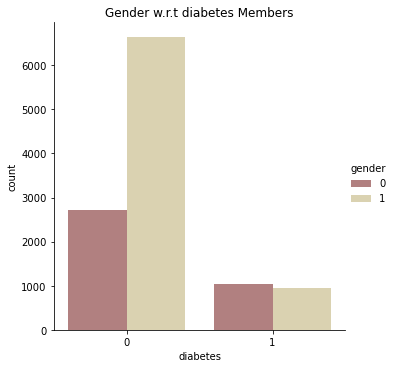

In [284]:
# Gender w.r.t diabetes Members
plt.figure(figsize = (25,25))
sns.catplot(x = 'diabetes', 
            kind = 'count', 
            hue = 'gender', 
            palette = 'pink', 
            data = df)
plt.title("Gender w.r.t diabetes Members")
plt.show()

<Figure size 3240x4680 with 0 Axes>

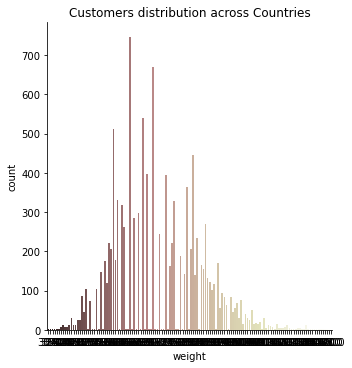

In [285]:
plt.figure(figsize = (45,65))
sns.catplot(x = 'weight', kind = 'count', data = df, palette = 'pink')
plt.title('Customers distribution across Countries')
plt.show()

<Figure size 3240x4680 with 0 Axes>

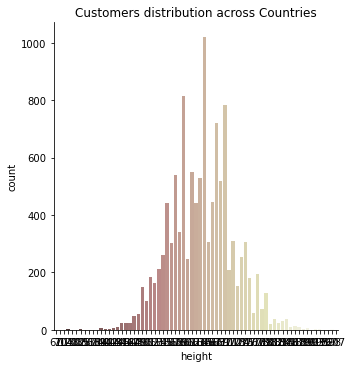

In [286]:
plt.figure(figsize = (45,65))
sns.catplot(x = 'height', kind = 'count', data = df, palette = 'pink')
plt.title('Customers distribution across Countries')
plt.show()

<Figure size 1080x1080 with 0 Axes>

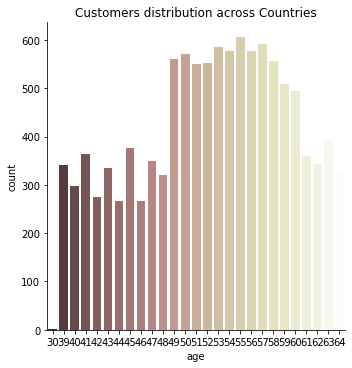

In [287]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'age', kind = 'count', data = df, palette = 'pink')
plt.title('Customers distribution across Countries')
plt.show()

# Feature Selection

# Metod - 1

<AxesSubplot:>

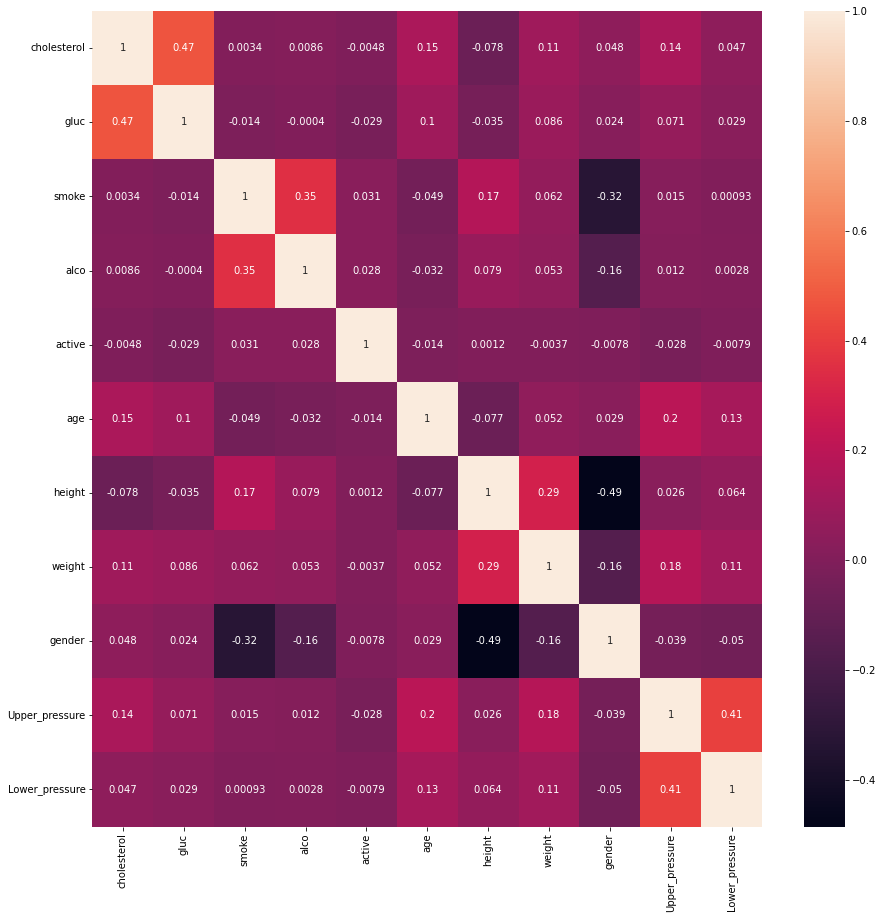

In [288]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.drop(['diabetes'], axis = 1).corr(), annot = True)

In [289]:
# we can see cholesterol and gluc is corelated wrt to 45%. 
# Generally above 70 or 80 percent corellated features we remove one of the features among them.
# so we will not drop any feature among them as percentage is not that high in it. we will keep both (cholesterol and gluc).

# Method - 2

[0.13655778 0.25755115 0.00376917 0.00242452 0.09108545 0.12142561
 0.0348188  0.13505051 0.06910685 0.04747978 0.10073038]


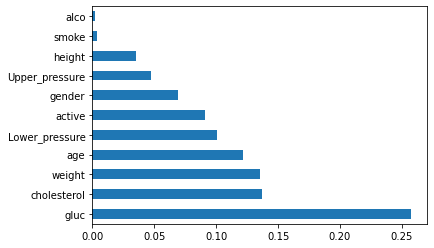

In [290]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

ranked_features = pd.Series(model.feature_importances_, index=X.columns)
ranked_features.nlargest(11).plot(kind='barh')
plt.show()

In [291]:
# we have found gluc is very important feature.
# Smoke and alco is least important. we can remove smoke.
# I will take it.

# Method - 3

In [292]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_features = SelectKBest(score_func=chi2,k=5)
ordered_feature=ordered_rank_features.fit(X,y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

feature_rank = pd.concat([dfcolumns,dfscores], axis=1)
feature_rank.columns=['Features','Score']
feature_rank

feature_rank.nlargest(11, 'Score')

,Features,Score
5,age,889666.299129
10,Lower_pressure,519709.105308
1,gluc,26527.288531
7,weight,22760.869050
0,cholesterol,14906.430184
9,Upper_pressure,12759.528742
8,gender,1025.547521
4,active,836.363633
6,height,429.357276
2,smoke,257.005042


In [293]:
# In this also smoke and alco is less important feature. So we can surely remove it.
# But I will not remove it.

# Method - 4

In [294]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)

mutual_data = pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

gluc              0.142764
cholesterol       0.090208
weight            0.067636
Lower_pressure    0.066328
Upper_pressure    0.053493
active            0.041270
age               0.038273
gender            0.029818
height            0.017010
alco              0.003859
smoke             0.003073
dtype: float64

In [ ]:
# smoke and alco is least imformative feature.

# Action we can Take - Drop smoke and Alco feature. 
# But I will keep both as it's a demo dataset.

# Splitting Train and Test data

In [295]:
# Features splitting 
X = df.drop('diabetes', axis = 1) # selecting all columns except the target
y = df['diabetes'] # Target variable

In [296]:
X.head()

,cholesterol,gluc,smoke,alco,active,age,height,weight,gender,Upper_pressure,Lower_pressure
0,0,0,0,0,1,54,169,76.0,0,100,80
1,0,0,0,0,1,49,165,65.0,1,120,82
14,1,0,0,0,1,53,164,68.0,1,110,80
15,0,0,0,0,0,41,169,86.0,0,120,80
20,0,0,0,0,1,64,163,112.0,1,130,80


In [297]:
y.head()

0     0
1     0
14    0
15    0
20    0
Name: diabetes, dtype: int64

In [298]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cholesterol,11349.0,0.294563,0.621569,0.0,0.0,0.0,0.0,2.0
gluc,11349.0,0.202837,0.547132,0.0,0.0,0.0,0.0,2.0
smoke,11349.0,0.080007,0.271316,0.0,0.0,0.0,0.0,1.0
alco,11349.0,0.047581,0.212888,0.0,0.0,0.0,0.0,1.0
active,11349.0,0.801833,0.398636,0.0,1.0,1.0,1.0,1.0
diabetes,11349.0,0.175786,0.380655,0.0,0.0,0.0,0.0,1.0
age,11349.0,52.356331,6.848137,30.0,47.0,53.0,58.0,64.0
height,11349.0,164.459159,7.837452,67.0,159.0,165.0,170.0,207.0
weight,11349.0,72.600908,13.477329,30.0,64.0,70.0,80.0,170.0
gender,11349.0,0.668958,0.470609,0.0,0.0,1.0,1.0,1.0


In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7944, 11), (3405, 11), (7944,), (3405,))

In [300]:
X_train.head()

,cholesterol,gluc,smoke,alco,active,age,height,weight,gender,Upper_pressure,Lower_pressure
16282,2,2,0,0,1,57,167,110.0,0,130,80
25399,1,0,0,0,1,48,166,89.0,1,100,70
52514,0,2,1,1,1,48,168,67.0,0,120,80
52670,0,0,0,0,1,42,152,50.0,1,100,70
51018,0,0,0,0,0,43,159,110.0,1,130,80


In [301]:
y_train.head()

16282    1
25399    0
52514    1
52670    0
51018    0
Name: diabetes, dtype: int64

# Feature Scaling

In [302]:
from sklearn.preprocessing import MinMaxScaler

# Initialization of the class
scaler = MinMaxScaler()

# Applying the scaler on test and train data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection - (Selecting the Best Model)

In [303]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))


names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.975918
1  SVC  0.987372
2   LR  0.988840
3   DT  0.978267
4  GNB  0.893686
5   RF  0.983554
6   GB  0.981791


# Logistic Regression

In [317]:
model_Log = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [318]:
y_pred_Log = model_Log.predict(X_test)

#Evaluating the Random Forest Model
print("accuracy_score for Logisti Regression : ",accuracy_score(y_test,y_pred_Log))
print()
print(confusion_matrix(y_test,y_pred_Log))
print()
print(classification_report(y_test,y_pred_Log))

accuracy_score for Logisti Regression :  0.9847283406754772

[[2770   14]
 [  38  583]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2784
           1       0.98      0.94      0.96       621

    accuracy                           0.98      3405
   macro avg       0.98      0.97      0.97      3405
weighted avg       0.98      0.98      0.98      3405



# Hyper Parameter tuning on Random Forest Algo

In [304]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 210, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(12, 120, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 6, 8, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [12, 22, 33, 44, 55, 66, 76, 87, 98, 109, 120, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'min_samples_split': [2, 5, 6, 8, 10],
 'n_estimators': [210, 408, 607, 806, 1005, 1204, 1403, 1602, 1801, 2000]}


In [305]:
# Use the random grid to search for best hyperparameters

rf = RandomForestClassifier()
 
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [12, 22, 33, 44, 55, 66,
                                                      76, 87, 98, 109, 120,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 6, 8, 10],
                                        'n_estimators': [210, 408, 607, 806,
                                                         1005, 1204, 1403, 1602,
                                                         1801, 2000]},
                   random_state=42, verbose=2)

In [306]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 22,
 'bootstrap': True}

# We will fit the obtained parameters in the Random Forest Model

In [307]:
# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=2000,
                                   min_samples_split=5,
                                   min_samples_leaf=1,
                                   max_features='sqrt',
                                   max_depth=22,
                                   bootstrap='True')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap='True', max_depth=22, max_features='sqrt',
                       min_samples_split=5, n_estimators=2000)

In [308]:
y_pred_forest = classifier.predict(X_test)

#Evaluating the Random Forest Model
print("accuracy_score for Random Forest : ",accuracy_score(y_test,y_pred_forest))
print()
print(confusion_matrix(y_test,y_pred_forest))
print()
print(classification_report(y_test,y_pred_forest))

accuracy_score for Random Forest :  0.9812041116005874

[[2748   36]
 [  28  593]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2784
           1       0.94      0.95      0.95       621

    accuracy                           0.98      3405
   macro avg       0.97      0.97      0.97      3405
weighted avg       0.98      0.98      0.98      3405



# Note - Logistic Regression performs better Than Random Forest Algo. As Type 1 and Type 2 error is less in Logistic regression

In [319]:
# Creating a pickle file for the classifier
filename = 'diabetes-prediction-Logistic-model.pkl'
pickle.dump(model_Log, open(filename, 'wb'))